# Power Production - a Machine Learning project playground

>Author: **Andrzej Kocielski**  

This is a playground notebook for testing only. The actual project notebook is [Powerproduction_ML.ipynb](https://github.com/andkoc001/Machine-Learning-and-Statistics-Project.git/Powerproduction_ML.ipynb).

For more information see [README.md](https://github.com/andkoc001/Machine-Learning-and-Statistics-Project.git/README.MD).


___

## Loose notes and ideas

### Ideas

1. There is a number of observation in the data set where produced power output is zero, regardless of the wind speed. These data points should be removed from analysis.
2. ...

### ML Techniques

- Unsupervised
    - Clustering
    - Dimensional reduction
- Supervised
    - Regression
    - Classification
- Reinforced Learning

![image](https://miro.medium.com/max/700/1*AqNYz4M_GgfUN2ROb798yg.jpeg)

Image source: [Medium.com](https://miro.medium.com/max/700/1*AqNYz4M_GgfUN2ROb798yg.jpeg)

### ML algorithms

- Linear regression
- Logarithmic regression
- Decision Tree
- Decision Forrest
- Random Forrest
- t-Test
- k nearest neighbour (kNN)
- k-means
- Anova (analysis of variance)
- Support Vector Machine (SVM)
- Principal Component Analysis (PCA)
- Naive Bayes
- Dimensionality Reduction Algorithms

![image](https://docs.microsoft.com/en-us/azure/machine-learning/media/algorithm-cheat-sheet/machine-learning-algorithm-cheat-sheet.svg)
Image source: [Microsoft.com](https://docs.microsoft.com/en-us/azure/machine-learning/media/algorithm-cheat-sheet/machine-learning-algorithm-cheat-sheet.svg)

![image](https://miro.medium.com/max/1920/1*Lejtm0oGlOC5U0-J0JmGhg.png)
Image source: [Medium.com](https://miro.medium.com/max/1920/1*Lejtm0oGlOC5U0-J0JmGhg.png)

### To Do

1. Exploratory data analysis
2. Data cleaning
3. Data modeling (add / combine / infer additional data)
4. Select ML techniques to be used (explain why)
5. Do ML - analyse predictions accuracy etc. for various boundary conditions and parameters
6. Draw a conclusion

___

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests

## Data set

In [2]:
# Data set is loaded from the file `powerproduction.txt`.
df = pd.read_csv(r"powerproduction.txt")

In [ ]:
df

## Import Seaborn

In [13]:
# plotting config
plt.style.use('ggplot')
plt.figure(figsize=(12,6))

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

In [ ]:
sns.relplot(data=df, x="speed", y="power", s=20, palette="pastel", height=6, aspect=2)

In [ ]:
# a new dataframe, showing how speed values are separated from each other - difference between subsequent and current speed value
df_sd = pd.DataFrame()
print(df_sd)
for index, row in df.iterrows():
    speed_difference = df.iloc[index]['speed'] - df.iloc[index-1]['speed']
    # print(speed_difference)
    df_sd = df_sd.append({'speed diff': speed_difference}, ignore_index=True)

df_sd = df_sd.drop(index=[0], axis=0)
print(df_sd)  

In [ ]:
df_sd.describe()

In [ ]:
sns.distplot(df_sd)

In [ ]:
# what wind speeds dominate - it appears to be more or less uniformely distributed
plt.figure(figsize=(20,2))
sns.distplot(df.speed, bins=100, kde=False)

In [ ]:
plt.figure(figsize=(20,4))
sns.distplot(df.power, bins=100, kde=False)

In [ ]:
sns.relplot(
    data=df,
    x="speed", y="power",
    kind="line", size_order=["T1", "T2"], palette="pastel",
    height=6, aspect=3, facet_kws=dict(sharex=False)
)

In [ ]:
# Linear regression is an underfitting approximation
plt.figure(figsize=(15,4))
sns.regplot(data=df, x="speed", y="power", scatter_kws={'s':1})

In [ ]:
# clean the dataset by removing all observations where the power output is zero

df_clean = df[df['power'] !=0]
df_clean

In [ ]:
sns.jointplot(x = "speed", y = "power", data = df_clean)

In [ ]:
ord = np.polyfit(df_clean["speed"], df_clean["power"], 3)
print(ord)

# y = pow(df_clean["speed"],ord[0]) + pow(df_clean["speed"],ord[1]) + ord[2]

x = df_clean["speed"]
# plt.ylim([0, 110])
plt.plot(x, df_clean["power"], "b.")
plt.plot(x, ord[0]*pow(x,3) + ord[1]*pow(x,2) + ord[2]*pow(x,1) + ord[3], "r-")


In [ ]:
# Do regression on the x and y arrays using numpy.

coefficients = []
for order in range(9):
    order = order
    coefficients = np.polyfit(df_clean["speed"], df_clean["power"], order)
    print(f"Order {order+1}: ", end="")
    for i in range(order+1):
        print(f"{coefficients[i]:.6f} ", end="  ")
        y = pow(df_clean["speed"],i) 
        
    print("\n")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x=df_clean["speed"], y=df_clean["power"], test_size=0.3, random_state=101)

In [ ]:
# Polynomial regression for cleaned dataset
a_plot = sns.lmplot(data=df_clean, x="speed", y="power", order=9, height=6, aspect=2, scatter_kws={'s':1})

a_plot.set(xlim=(0, 25))
a_plot.set(ylim=(0, 120))

plt.show()

The above polynomial appears to closely follow the pattern of the data points in the domain (wind speed in range 0-25).

Let's now apply the Numpy function `polyfit()` to get the value of the coefficients that minimise the squared order.

In [ ]:
coeff = np.polyfit(df['speed'], df['power'], 9)
#coeff

Testing the above - attempt to reproduce the plot of the polynomial with the above coefficients.

In [ ]:
coeff = np.polyfit(df['speed'], df['power'], 9)
#coeff

#with warnings.catch_warnings():
#    warnings.simplefilter('ignore', np.RankWarning)    
#    y = np.poly1d(coeff)
    
yp = np.poly1d(coeff)
    
x = np.linspace(0, 24.5, 101)
xp = plt.plot(x, yp(x))

plt.xlim(0,25)
plt.ylim(0,120)

plt.rcParams['figure.figsize'] = [15, 6]
plt.show()
print("y = ")
print(yp)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# from sklearn import linear_model

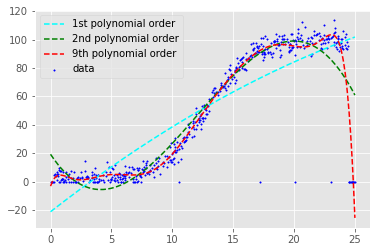

<Figure size 432x216 with 0 Axes>

In [17]:
# adapted from https://stackoverflow.com/q/51732577
# create a shorthand for the column names
X = df.iloc[:, 0].values.reshape(-1,1)
y = df.iloc[:, 1].values.reshape(-1,1)
plt.scatter(X, y, s=2, color='blue', label="data")

# Fitting Polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
plt.plot(X, lin_reg.predict(X_poly), ls="--", color = 'cyan', label='1st polynomial order')

poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
plt.plot(X, lin_reg.predict(X_poly), ls="--", color = 'green', label='2nd polynomial order')

poly_reg = PolynomialFeatures(degree = 10)
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
plt.plot(X, lin_reg.predict(X_poly), ls="--", color = 'red', label='9th polynomial order')


# Visualising the Polynomial Regression results
plt.legend(loc='best')
# plt.xlim(0,25)
# plt.ylim(0,120)
plt.figure(figsize=(6,3))
plt.show()

In [ ]:
# adapted from https://stackoverflow.com/q/51732577
# create a shorthand for the column names
X = df.iloc[:, 0].values.reshape(-1,1)
y = df.iloc[:, 1].values.reshape(-1,1)

# Fitting Polynomial Regression to the dataset
poly_reg_2 = PolynomialFeatures(degree = 2)
X_poly = poly_reg_2.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

poly_reg_3 = PolynomialFeatures(degree = 3)
X_poly = poly_reg_3.fit_transform(X)
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly, y)

poly_reg_10 = PolynomialFeatures(degree = 10)
X_poly = poly_reg_10.fit_transform(X)
lin_reg_10 = LinearRegression()
lin_reg_10.fit(X_poly, y)


# Visualising the Polynomial Regression results
plt.scatter(X, y, s=2, color='blue', label="data")
plt.plot(X, lin_reg_2.predict(poly_reg_2.fit_transform(X)), ls="--", color = 'cyan', label='1st polynomial order')
plt.plot(X, lin_reg_3.predict(poly_reg_3.fit_transform(X)), ls="--", color = 'green', label='3rd polynomial order')
plt.plot(X, lin_reg_9.predict(poly_reg_9.fit_transform(X)), ls="--", color = 'red', label='9th polynomial order')
plt.legend(loc='best')
plt.xlim(0,25)
plt.ylim(0,120)
plt.show()

In [ ]:
# adapted from https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_polynomial_regression.html
X = df.iloc[:, 0]
y = df.iloc[:, 1].values.reshape(-1,1)
plt.scatter(X, y, s=2, color='blue', label="data")

X_test = np.array([X**i for i in range(2)]).T
regr = linear_model.LinearRegression()
regr.fit(X_test, y)
plt.plot(X, regr.predict(X_test), ls="--", color = 'cyan', label='1st polynomial order')

X_test = np.array([X**i for i in range(4)]).T
regr = linear_model.LinearRegression()
regr.fit(X_test, y)
plt.plot(X, regr.predict(X_test), ls="--", color = 'green', label='3rd polynomial order')

X_test = np.array([X**i for i in range(10)]).T
regr = linear_model.LinearRegression()
regr.fit(X_test, y)
plt.plot(X, regr.predict(X_test), ls="--", color="red", label='9th polynomial order')

plt.xlim(0,25)
plt.ylim(0,120)
plt.legend(loc='best')

In [ ]:
from scipy.stats import linregress

#help(linregress)
linregress(df)

Where (from the function help file):

slope - Slope of the regression line.

intercept - Intercept of the regression line.

rvalue - Correlation coefficient.

pvalue - Two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero, using Wald Test with t-distribution of the test statistic.

stderr - Standard error of the estimated gradient.

https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

---

## Playing with Requests

The `requests` library has been now added to the other imported libraries on top of the notebook.

In [ ]:
url = "https://www.gmit.ie"

# also check https://www.httpbin.org

In [ ]:
res = requests.get(url)
res

In [ ]:
print(dir(res))
print(help(res))

In [ ]:
res.status_code

In [ ]:
print(res.headers)

In [ ]:
print(res.text) # print() is used for better text formating